# 图46 季节图

季节图可用于比较时间序列在上一季(年/月/周等)同一天的表现。

原代码关于traffic改为value的问题此处不赘述.

D:\code\platform\Deep-Learning-Framework\doc\Plot\require.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


1.23.5
2.0.0
3.7.1
0.12.2


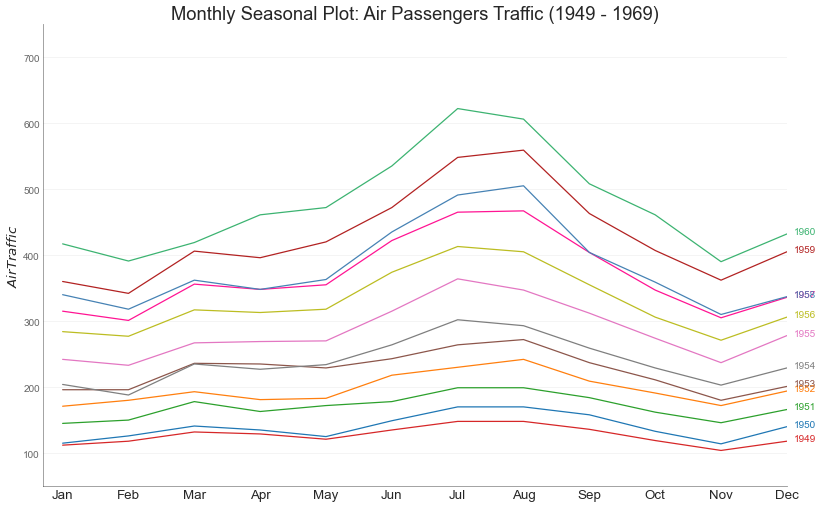

In [1]:
from doc.Plot.require import *
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
# df = pd.read_csv('../data/air_passengers.csv')

# Prepare data
df['year'] = [parse(d).year for d in df.date]
df['month'] = [parse(d).strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
my_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive',
             'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']
plt.figure(figsize=(16, 10), dpi=60)

for i, y in enumerate(years):
    plt.plot('month', 'value', data=df.loc[df.year == y, :], color=my_colors[i], label=y)
    plt.text(df.loc[df.year == y, :].shape[0] - .9, df.loc[df.year == y, 'value'][-1:].values[0], y, fontsize=12,
             color=my_colors[i])

# Decoration
plt.ylim(50, 750)
plt.xlim(-0.3, 11)
plt.ylabel('$Air Traffic$')
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='y', alpha=0.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.5)

plt.show()